<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته دهم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

In [142]:
# import all packages and libraries here.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1- State with reasons whether the following sentences are true or false?

<ul style="font-size:25px">
    <li>
        SVMs are not suitable for large datasets.
    </li>
    <li>
       SVMs perform poorly in imbalanced datasets.
    </li>
     <li>
        SVMs perform poorly when there is just too much noise in the data.
    </li>
</ul>

https://towardsdatascience.com/when-do-support-vector-machines-fail-3f23295ebef2

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
        1-  برای دیتاست بزرگ
وقتی تعداد فیچر زیاد است عملکرد خوبه
ولی وقتی سمپل زیاده مدل خوبه ولی زمان حلش خیلی بالاست
    
        The original SVM implementation is known to have a concrete theoretical foundation, but it is not suitable for classifying in large datasets for one straightforward reason — the complexity of the algorithm’s training is highly dependent on the size of the dataset. In other words, training time grows with the dataset to a point where it becomes infeasible to train and use due to compute constraints.
        </br>
        2- برای دیتاست های نامتعادل خوب عمل نمی کند
    There are two more well-attributed reasons [2] for this. The first being the weakness of the soft margin optimization problem. This results in the hyperplanes being skewed to the minority class when imbalanced data is used for training. The second reason arises from the issue of an imbalanced support vector ratio, i.e. the ratio between the positive and negative support vectors becoming imbalanced and as a result, datapoints at the decision boundaries of the hyperplanes have a higher chance of being classified as negative.
		</br>
        3- وقتی نویز زیاد است و کرنل از نوع خطی و پلی نومیال نیست بد عمل میکند
        In these cases of noisy data, target classes are overlapping, in the sense that the features can have very similar or overlapping properties. This possibly results in arriving at several local optima due to the nature of the optimization algorithm, especially for high dimensional datasets. However, it is worthwhile to note that noise should not be the problem for kernels with high-bias, such as the linear and polynomial kernels. The issue of noise should lie more for the low-bias kernels such as the radial basis function (RBF).
</div>
 



<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ۲- دیتاست lsvt-voice-rehabilitation را از لینک زیر دانلود کنید و به سوالات زیر حواب دهید. در این تمرین مجاز به استفاده از کتابخانه scikit-learn می باشید.
		</br>
</div>
		https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation

In [143]:
Data=pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name='Data')
response=pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name='Binary response')

In [144]:
X=Data.iloc[:,:].values
y=response.iloc[:,0].values

In [145]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 الف- داده ها را به روشهای زیر دسته بندی کنید (حواستان باشد که داده ها را قبل از اعمال به مدل، نرمالایز کنید).
        <ul>
            <li>
            کرنل خطی
            </li>
            <li>
            کرنل چندجمله ای (پارامترهای r, d)
            </li>
            <li>
            کرنل rbf - پارامتر گاما
            </li>
            <li>
            سیگمویید - پارامتر r
            </li>           
         </ul>
</div

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ب- معیار دقت و f1 را برای هریک از دسته بندی های قسمت الف به دست آورید. (برای هر یک از پارامترهای گفته شده حداقل سه مقدار مختلف در نظر بگیرید)
		</br>
</div>

In [146]:
#RBF
pipe=make_pipeline(StandardScaler(),SVC())
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)

In [147]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.83      0.33      0.48        15
           2       0.69      0.96      0.80        23

    accuracy                           0.71        38
   macro avg       0.76      0.64      0.64        38
weighted avg       0.75      0.71      0.67        38



In [148]:
#Linear
pipe=make_pipeline(StandardScaler(),SVC(kernel='linear'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)

In [149]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.91      0.91      0.91        23

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



In [150]:
#polynomial
pipe=make_pipeline(StandardScaler(),SVC(kernel='poly'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)

In [151]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      0.07      0.12        15
           2       0.62      1.00      0.77        23

    accuracy                           0.63        38
   macro avg       0.81      0.53      0.45        38
weighted avg       0.77      0.63      0.51        38



In [152]:
#sigmoid
pipe=make_pipeline(StandardScaler(),SVC(kernel='sigmoid'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)

In [153]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.86      0.40      0.55        15
           2       0.71      0.96      0.81        23

    accuracy                           0.74        38
   macro avg       0.78      0.68      0.68        38
weighted avg       0.77      0.74      0.71        38



<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ج- تاثیر پارامترهای هر کرنل را بر کارآیی مدل ها تحلیل کنید.
		</br>
</div>

In [154]:
#RBF
pipe=make_pipeline(StandardScaler(),SVC())
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("No Parameter")
print(classification_report(y_test,predict))

pipe=make_pipeline(StandardScaler(),SVC(C=10,gamma='auto',decision_function_shape='ovr'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("Parameter: gamma auto, C=10")
print(classification_report(y_test,predict))

pipe=make_pipeline(StandardScaler(),SVC(C=50,gamma=1,decision_function_shape='ovr'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("Parameter: gamma 10, C=100")
print(classification_report(y_test,predict))

No Parameter
              precision    recall  f1-score   support

           1       0.83      0.33      0.48        15
           2       0.69      0.96      0.80        23

    accuracy                           0.71        38
   macro avg       0.76      0.64      0.64        38
weighted avg       0.75      0.71      0.67        38

Parameter: gamma auto, C=10
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        15
           2       0.83      0.83      0.83        23

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.79      0.79      0.79        38

Parameter: gamma 10, C=100
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.61      1.00      0.75        23

    accuracy                           0.61        38
   macro avg       0.30      0.50      0.38        38
weight

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [155]:
#polynomial
pipe=make_pipeline(StandardScaler(),SVC(kernel='linear'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("No Parameter")
print(classification_report(y_test,predict))

pipe=make_pipeline(StandardScaler(),SVC(kernel='linear', gamma='auto',degree=10, C=10))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("Parameter: gamma=auto  degree=5 C=10")
print(classification_report(y_test,predict))

No Parameter
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.91      0.91      0.91        23

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38

Parameter: gamma=auto  degree=5 C=10
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.91      0.91      0.91        23

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



In [156]:
#sigmoid
pipe=make_pipeline(StandardScaler(),SVC(kernel='sigmoid'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("No Parameter")
print(classification_report(y_test,predict))

pipe=make_pipeline(StandardScaler(),SVC(kernel='sigmoid', gamma=200))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("Parameter: gamma=200")
print(classification_report(y_test,predict))

pipe=make_pipeline(StandardScaler(),SVC(kernel='sigmoid', gamma='auto'))
pipe.fit(X_train,y_train)
predict=pipe.predict(X_test)
print("Parameter: gamma=auto")
print(classification_report(y_test,predict))

No Parameter
              precision    recall  f1-score   support

           1       0.86      0.40      0.55        15
           2       0.71      0.96      0.81        23

    accuracy                           0.74        38
   macro avg       0.78      0.68      0.68        38
weighted avg       0.77      0.74      0.71        38

Parameter: gamma=200
              precision    recall  f1-score   support

           1       0.56      0.33      0.42        15
           2       0.66      0.83      0.73        23

    accuracy                           0.63        38
   macro avg       0.61      0.58      0.57        38
weighted avg       0.62      0.63      0.61        38

Parameter: gamma=auto
              precision    recall  f1-score   support

           1       0.86      0.40      0.55        15
           2       0.71      0.96      0.81        23

    accuracy                           0.74        38
   macro avg       0.78      0.68      0.68        38
weighted avg      

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 د- کدام مدل عملکرد بهتری دارد؟ چرا؟
		</br>
</div>

مدل خطی عملکرد بهتری نشان می دهد
احتمالا به این دلیل که دیتا ها به صورت خطی قابل جداسازی هستند

# 3- Student Intervention System

<div style="margin-left: 10px;font-size:25px">a) Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.</div>

In [157]:
df = pd.read_csv("student_data.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


<div style="margin-left: 10px;font-size:25px">
  <p>  
b) Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
    </p>
    <ul>
        <li>The total number of students, n_students.</li>
        <li>The total number of features for each student, n_features.</li>
        <li>The number of those students who passed, n_passed.</li>
        <li>The number of those students who failed, n_failed.</li>
        <li>The graduation rate of the class, grad_rate, in percent (%).</li>
     </ul>

</div>

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [159]:
# TODO: Calculate number of students
n_students = len(df)

# TODO: Calculate number of features
n_features = len(df.columns)-1

# TODO: Calculate passing students
n_passed = len(df[df["passed"]=='yes'])

# TODO: Calculate failing students
n_failed = len(df[df["passed"]=='no'])

# TODO: Calculate graduation rate
grad_rate = n_passed/n_students

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


<div style="margin-left: 10px;font-size:25px">
    <p>c) Preparing the Data</p>
    <p>In this section, we will prepare the data for modeling, training and testing.</p>
    <p>Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.</p>
</div>




In [160]:
# Extract feature columns
feature_cols = list(df.columns[:-1])

# Extract target column 'passed'
target_col = df.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X = student_data[feature_cols]
y = student_data[target_col]

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


<div style="margin-left: 10px;font-size:25px">
    <p>d) Preprocess Feature Columns</p>
    <p>As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.</p>
    <p>
Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.</p>
</div>


In [161]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is non-numeric, replace all binary values with 1/0
        if col_data.dtype == object and len(col_data.unique()) == 2:
            print("*****binary*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            col_data = col_data.replace(col_data_unique, [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object and len(col_data.unique()) != 2:
            print("*****categorical*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_preprocessed = preprocess_features(X)

*****binary*****
col name:  school----unique values:  ['GP' 'MS']
*****binary*****
col name:  sex----unique values:  ['F' 'M']
*****binary*****
col name:  address----unique values:  ['U' 'R']
*****binary*****
col name:  famsize----unique values:  ['GT3' 'LE3']
*****binary*****
col name:  Pstatus----unique values:  ['A' 'T']
*****categorical*****
col name:  Mjob----unique values:  ['at_home' 'health' 'other' 'services' 'teacher']
*****categorical*****
col name:  Fjob----unique values:  ['teacher' 'other' 'services' 'health' 'at_home']
*****categorical*****
col name:  reason----unique values:  ['course' 'other' 'home' 'reputation']
*****categorical*****
col name:  guardian----unique values:  ['mother' 'father' 'other']
*****binary*****
col name:  schoolsup----unique values:  ['yes' 'no']
*****binary*****
col name:  famsup----unique values:  ['no' 'yes']
*****binary*****
col name:  paid----unique values:  ['no' 'yes']
*****binary*****
col name:  activities----unique values:  ['no' 'yes']


In [162]:
df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11336\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


C:\Users\Asus\AppData\Local\Temp\ipykernel_11336\1911544441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

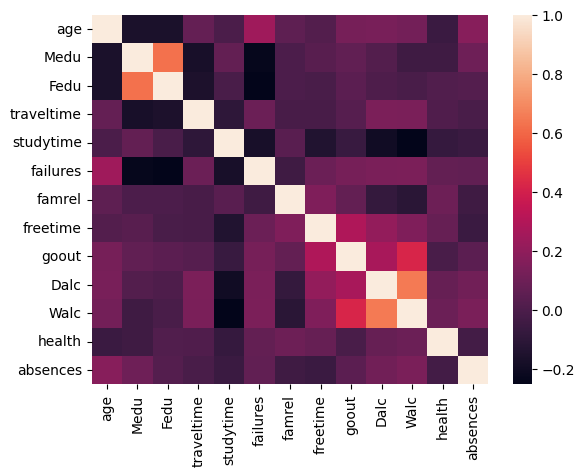

In [163]:
import seaborn as sns

sns.heatmap(df.corr())

<div style="margin-left: 10px;font-size:25px">
    <p>e) Training and Testing Data Split</p>
    <p>split the data (both features and corresponding labels) into training and test sets.(Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).)</p>
</div>

In [164]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y = y.replace(['yes','no'], [1, 0])

# TODO: split the dataset into the number of training and testing
X_train, X_test, y_train, y_test=train_test_split(X_preprocessed,y,test_size=0.25,random_state=0)

<div style="margin-left: 10px;font-size:25px">
<p>f) In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to training data and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.</p>
<p>The following supervised learning models are currently available in scikit-learn that you may choose from:</p>
    <ul>
        <li>Gaussian Naive Bayes (GaussianNB)</li>
        <li>K-Nearest Neighbors (KNeighbors)</li>
        <li>Stochastic Gradient Descent (SGDC)</li>
        <li>Support Vector Machines (SVM)</li>
        <li>Logistic Regression</li>
     </ul>
</div>    

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		 1- با توجه به اینکه دیتاها همبستگی کمی نشان می دهند گوسین نایو بیز مدل قابل استفاده ای است.
    </br>
        2- مدل svm چون حجم دیتاست کم است خوب عمل می کند
		</br>
        3- مدل logistic چون تارگت باینری است انتخاب خوبی است
		</br>
</div>

In [165]:
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(multi_class='multinomial'))
])

pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)
c=confusion_matrix(y_test, y_predict)

print("Logistic Regression")
print(classification_report(y_test, y_predict))
print(c)

Logistic Regression
              precision    recall  f1-score   support

           0       0.57      0.32      0.41        37
           1       0.68      0.85      0.76        62

    accuracy                           0.66        99
   macro avg       0.63      0.59      0.59        99
weighted avg       0.64      0.66      0.63        99

[[12 25]
 [ 9 53]]


In [167]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_model.predict_proba(X_test)

y_predict = gnb_model.predict(X_test)
c=confusion_matrix(y_test, y_predict)

print("GaussianNB")
print(classification_report(y_test, y_predict))
print(c)

GaussianNB
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        37
           1       0.65      0.85      0.74        62

    accuracy                           0.63        99
   macro avg       0.58      0.55      0.53        99
weighted avg       0.60      0.63      0.59        99

[[ 9 28]
 [ 9 53]]


In [168]:
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC(C=10))
pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)
c=confusion_matrix(y_test, y_predict)

print("SGD Classifier_SVM")
print(classification_report(y_test, y_predict))
print(c)

SGD Classifier_SVM
              precision    recall  f1-score   support

           0       0.60      0.32      0.42        37
           1       0.68      0.87      0.77        62

    accuracy                           0.67        99
   macro avg       0.64      0.60      0.59        99
weighted avg       0.65      0.67      0.64        99

[[12 25]
 [ 8 54]]


In [169]:
from sklearn.linear_model import SGDClassifier

sgr_model=make_pipeline(StandardScaler(),SGDClassifier(penalty='l2',alpha=0.9))
sgr_model.fit(X_train,y_train)
y_predict=sgr_model.predict(X_test)

print("Stochastic Gradient Descent (SGDC)")
print("R2_SCORE RidgeRegression: ", metrics.r2_score(y_test, y_predict))
print("MSE RidgeRegression: ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE RidgeRegression: ", metrics.mean_squared_error(y_test, y_predict,squared=False))
print("MAE RidgeRegression: ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE RidgeRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict))

Stochastic Gradient Descent (SGDC)
R2_SCORE RidgeRegression:  -0.46730601569311236
MSE RidgeRegression:  0.3434343434343434
RMSE RidgeRegression:  0.5860327153276884
MAE RidgeRegression:  0.3434343434343434
MAPE RidgeRegression:  1501199875790165.2


In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
c=confusion_matrix(y_test, y_predict)

print("KNN")
print(classification_report(y_test, y_predict))
print(c)

KNN
              precision    recall  f1-score   support

           0       0.52      0.30      0.38        37
           1       0.67      0.84      0.74        62

    accuracy                           0.64        99
   macro avg       0.60      0.57      0.56        99
weighted avg       0.61      0.64      0.61        99

[[11 26]
 [10 52]]
